In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

In [2]:
#1: Loading cars dataset
cars_df = pd.read_csv('cars_hw.csv')
cars_df.head(5)

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [3]:
#Drop index column 'Unnamed: 0'
cars_df = cars_df.drop(columns=['Unnamed: 0'])
cars_df.head(5)

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [4]:
#Drop 'No_of_Owners' column
cars_df = cars_df.drop(columns=['No_of_Owners'])
cars_df.head(5)

,Make,Make_Year,Color,Body_Type,Mileage_Run,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,Volkswagen,2017,silver,sedan,44611,5,diesel,7-Speed,Automatic,657000
1,Hyundai,2016,red,crossover,20305,5,petrol,5-Speed,Manual,682000
2,Honda,2019,white,suv,29540,5,petrol,5-Speed,Manual,793000
3,Renault,2017,bronze,hatchback,35680,5,petrol,5-Speed,Manual,414000
4,Hyundai,2017,orange,hatchback,25126,5,petrol,5-Speed,Manual,515000


In [5]:
#Check for missing (NAN) values
cars_df.isnull().sum()

,0
Make,0
Make_Year,0
Color,0
Body_Type,0
Mileage_Run,0
Seating_Capacity,0
Fuel_Type,0
Transmission,0
Transmission_Type,0
Price,0


In [6]:
#Check data types
cars_df.dtypes

,0
Make,object
Make_Year,int64
Color,object
Body_Type,object
Mileage_Run,int64
Seating_Capacity,int64
Fuel_Type,object
Transmission,object
Transmission_Type,object
Price,int64


In [7]:
#Check summary statistics for numerical values
cars_df.describe()

,Make_Year,Mileage_Run,Seating_Capacity,Price
count,976.000000,976.000000,976.000000,9.760000e+02
mean,2016.963115,41571.195697,5.095287,7.410195e+05
std,2.818742,24390.995134,0.446224,3.673234e+05
min,2011.000000,1117.000000,4.000000,1.880000e+05
25%,2015.000000,22676.750000,5.000000,4.757500e+05
50%,2017.000000,37570.500000,5.000000,6.665000e+05
75%,2019.000000,57421.250000,5.000000,8.830000e+05
max,2022.000000,99495.000000,8.000000,2.941000e+06


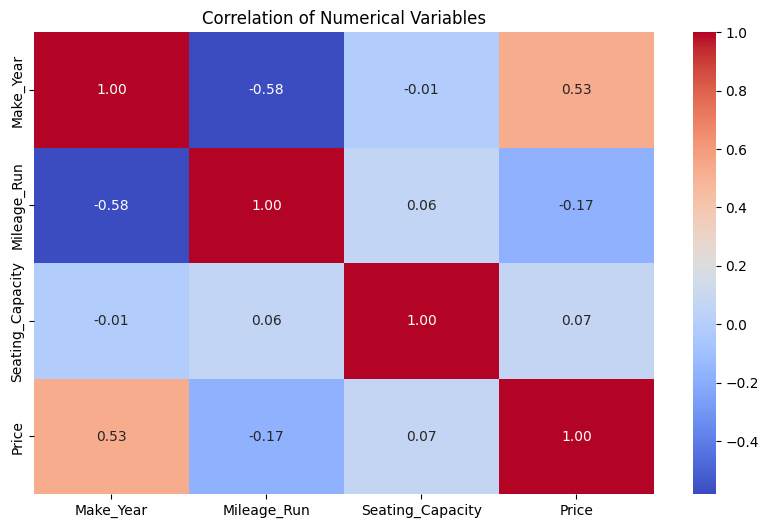

In [71]:
#Heatmap showing correlation between all numerical variables
numerical_variables = ['Make_Year', 'Mileage_Run', 'Seating_Capacity', 'Price']

plt.figure(figsize=(10, 6))
corr = cars_df[numerical_variables].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Numerical Variables')
plt.show()

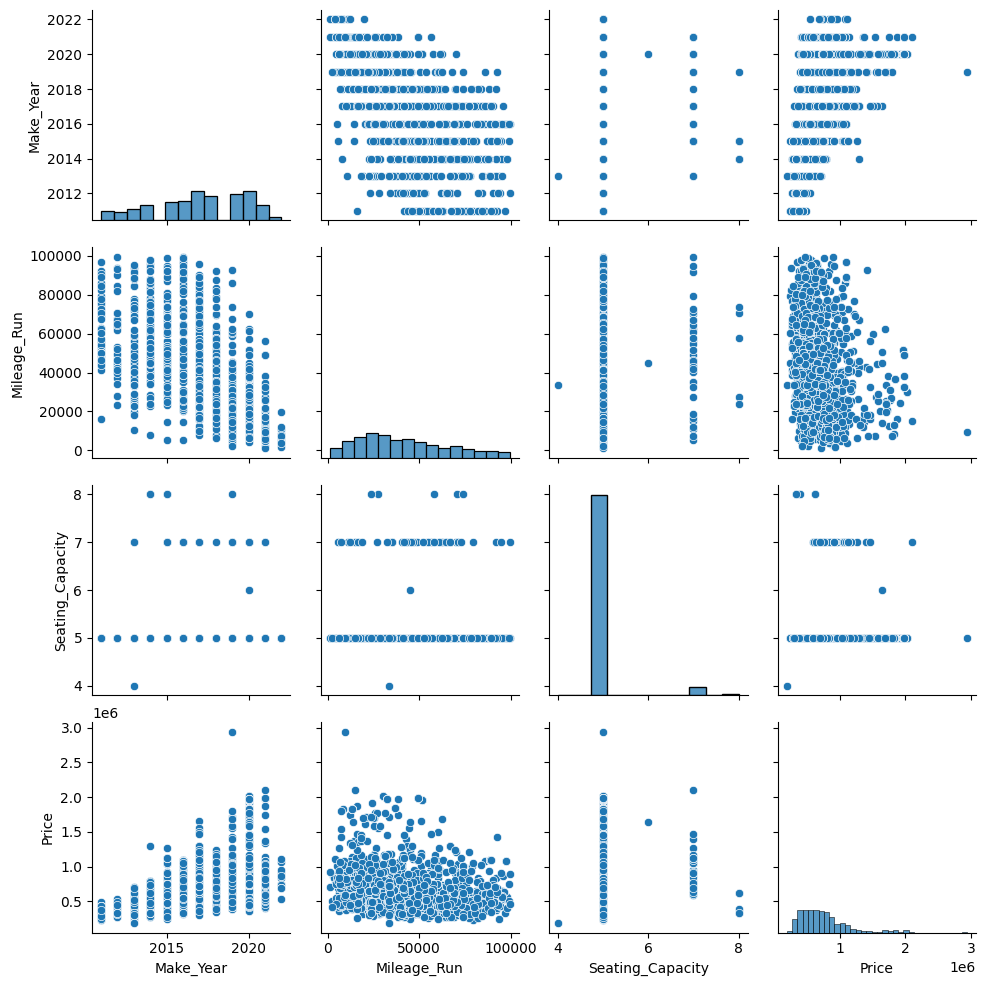

In [72]:
#Pairplot showing relationships of numerical variables
sns.pairplot(cars_df[numerical_variables])

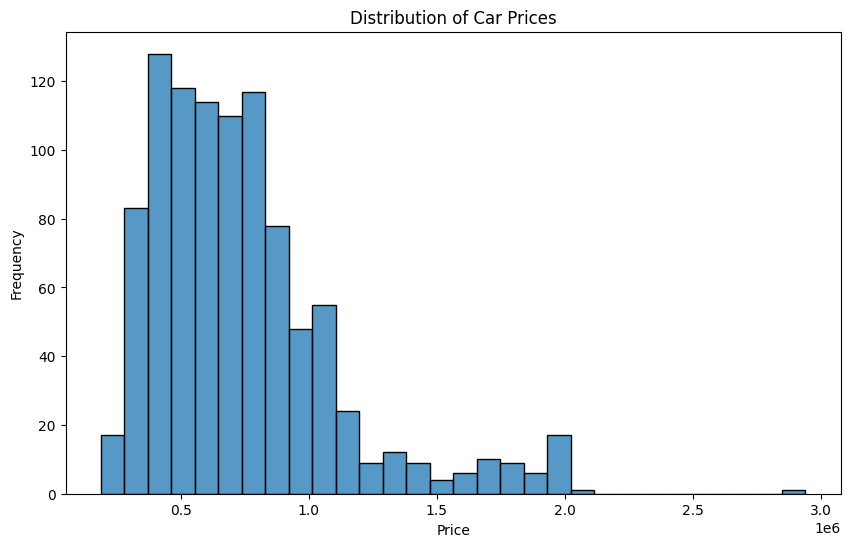

In [73]:
#Distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(cars_df['Price'], bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

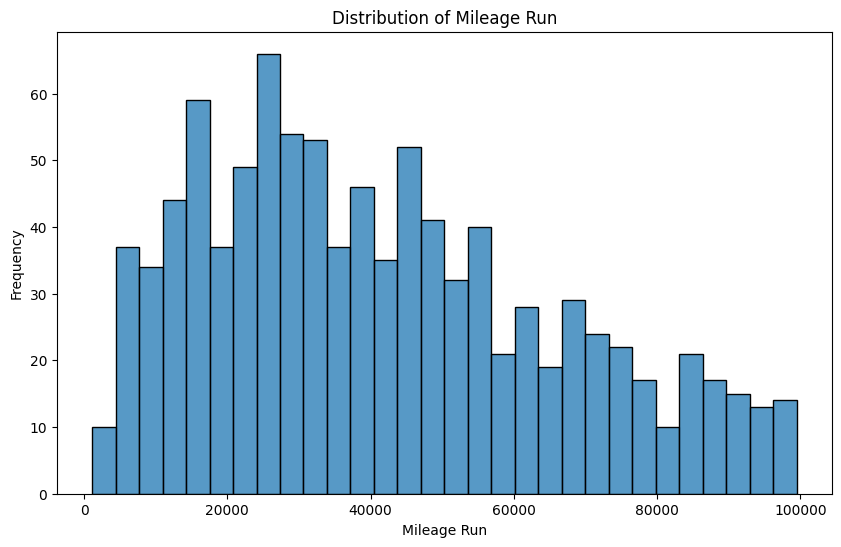

In [74]:
# Distribution of Mileage_Run
plt.figure(figsize=(10, 6))
sns.histplot(cars_df['Mileage_Run'], bins=30)
plt.title('Distribution of Mileage Run')
plt.xlabel('Mileage Run')
plt.ylabel('Frequency')
plt.show()

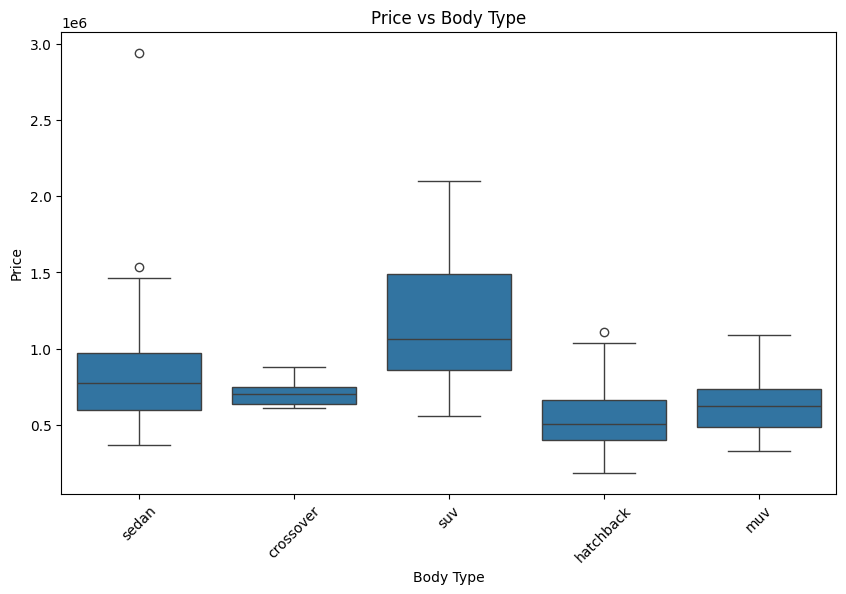

In [8]:
#Boxplot of Price vs Body_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Body_Type', y='Price', data=cars_df)
plt.title('Price vs Body Type')
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

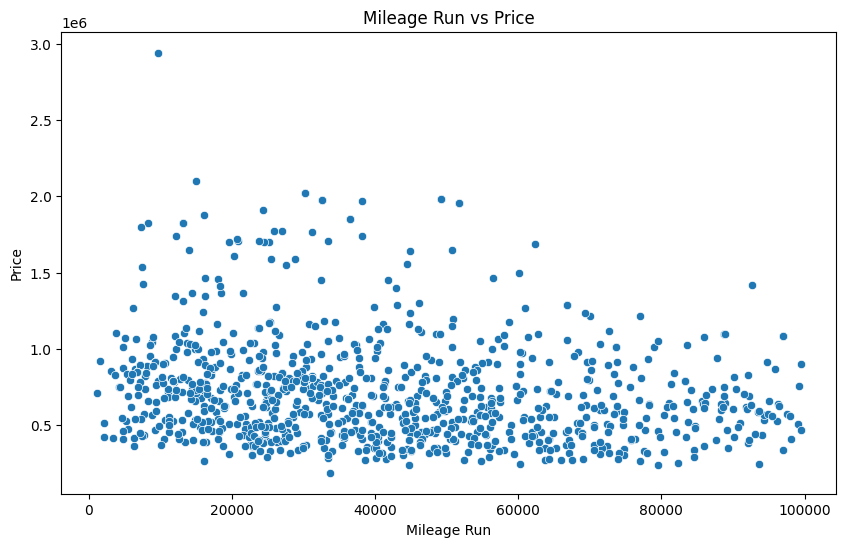

In [117]:
# Scatter plot of Price vs Mileage_Run
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage_Run', y='Price', data=cars_df)
plt.title('Mileage Run vs Price')
plt.xlabel('Mileage Run')
plt.ylabel('Price')
plt.show()

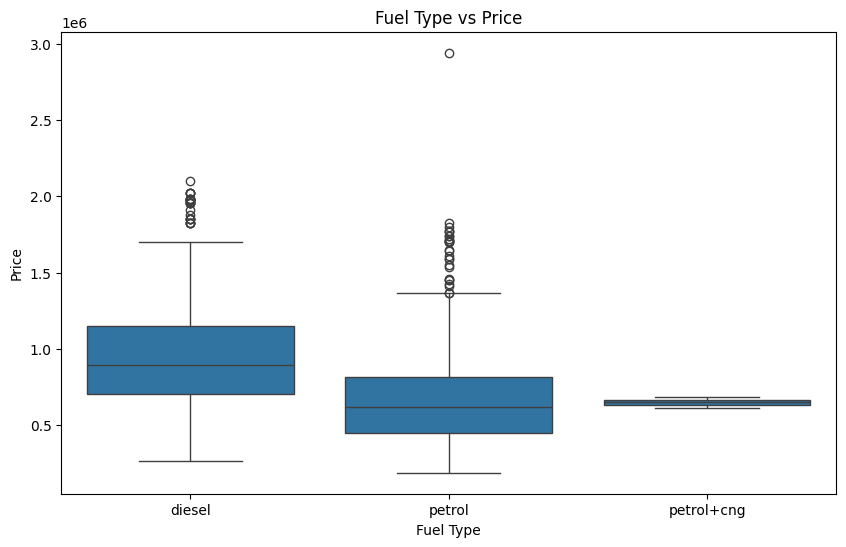

In [10]:
#Boxplot of Fuel_Type vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=cars_df)
plt.title('Fuel Type vs Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

In [11]:
#2: Transforming categorical variables
cars_df = pd.get_dummies(cars_df, columns=['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type'], drop_first=True)
cars_df.head(5)

,Make_Year,Mileage_Run,Seating_Capacity,Price,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,...,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Manual
0,2017,44611,5,657000,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1,2016,20305,5,682000,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
2,2019,29540,5,793000,False,False,True,False,False,False,...,False,False,True,True,False,True,False,False,False,True
3,2017,35680,5,414000,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,2017,25126,5,515000,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True


In [12]:
#3: Implementing an ~80/~20 train-test split with test data aside
X = cars_df.drop(columns=['Price'])
Y = cars_df['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
#4: Linear models with RMSE and R^2 on Training and Test sets with no transformations or interactions
model = LinearRegression()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print('RMSE Training:', rmse_train)
print('RMSE Test:', rmse_test)
print('R^2 Training:', r2_train)
print('R^2 Test:', r2_test)

RMSE Training: 142932.76208411707
RMSE Test: 142892.73856655904
R^2 Training: 0.8536345672083923
R^2 Test: 0.8219778645610453


Since both models have similar RMSE and R^2 values for training and test sets, both models perform the best.

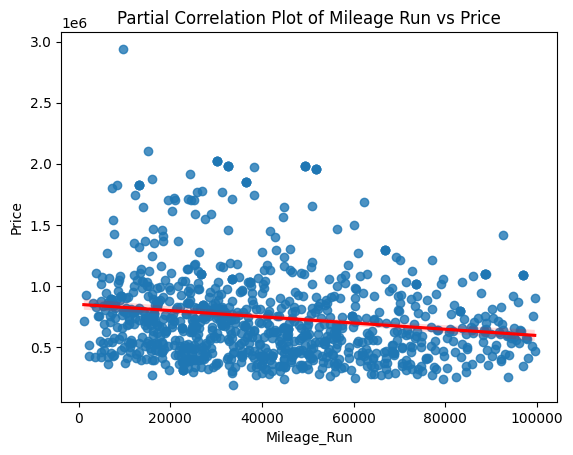

In [89]:
#5: Partial correlation plot of Mileage Run vs Price
sns.regplot(x='Mileage_Run', y='Price', data=cars_df, line_kws={'color': 'red'}).set(title='Partial Correlation Plot of Mileage Run vs Price')
plt.show()

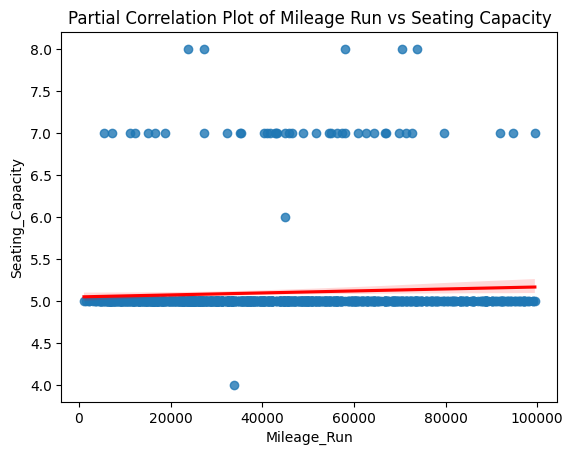

In [90]:
#Partial correlation plot of Mileage Run vs Seating Capacity
sns.regplot(x='Mileage_Run', y='Seating_Capacity', data=cars_df, line_kws={'color': 'red'}).set(title='Partial Correlation Plot of Mileage Run vs Seating Capacity')
plt.show()

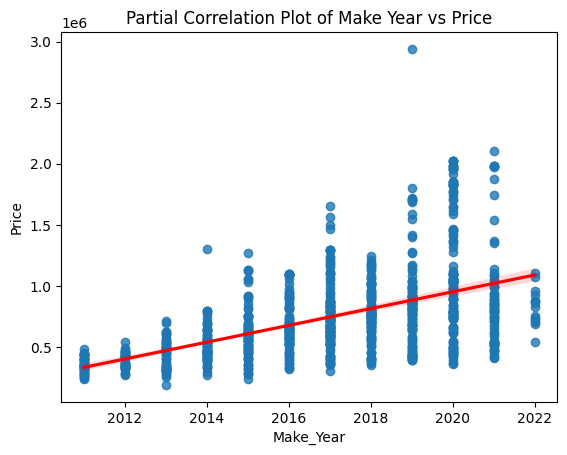

In [91]:
#Partial correlation plot of Make Year vs Price
sns.regplot(x='Make_Year', y='Price', data=cars_df, line_kws={'color': 'red'}).set(title='Partial Correlation Plot of Make Year vs Price')
plt.show()

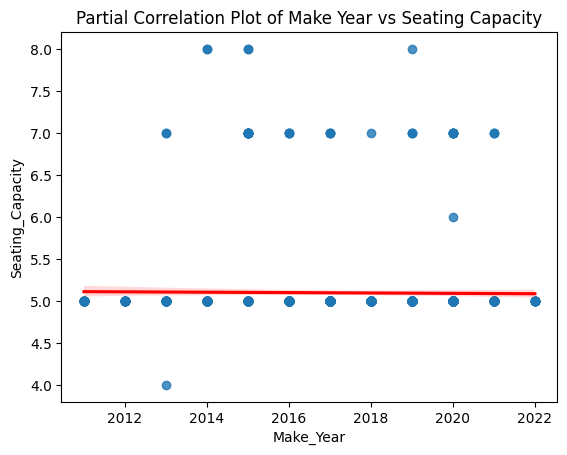

In [92]:
#Partial correlation plot of Make Year vs Seating Capacity
sns.regplot(x='Make_Year', y='Seating_Capacity', data=cars_df, line_kws={'color': 'red'}).set(title='Partial Correlation Plot of Make Year vs Seating Capacity')
plt.show()

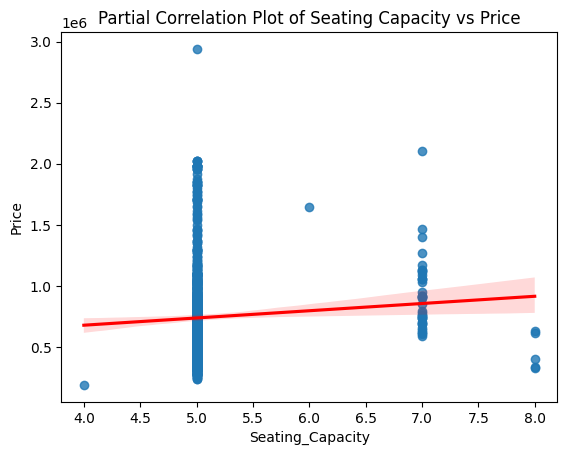

In [93]:
#Partial correlation plot of Seating Capacity vs Price
sns.regplot(x='Seating_Capacity', y='Price', data=cars_df, line_kws={'color': 'red'}).set(title='Partial Correlation Plot of Seating Capacity vs Price')
plt.show()

Based on the 5 partial correlation plots, there are no significant non-linearities. This is because the data points follow a straight regression line, which indicates that there is a linear relationship between two variables.

In [14]:
#6: Model with transformations and interactions of variables with RMSE and R^2 for Training and Test sets
cars_df['Log_Mileage_Run'] = np.log(cars_df['Mileage_Run'].replace(0, np.nan))
cars_df['Log_Price'] = np.log(cars_df['Price'].replace(0, np.nan))

cars_df['Mileage_Run_*_Seating_Capacity'] = cars_df['Log_Mileage_Run'] * cars_df['Seating_Capacity']

X = cars_df[['Log_Mileage_Run', 'Seating_Capacity', 'Mileage_Run_*_Seating_Capacity']]
Y = cars_df['Log_Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print('RMSE Training:', rmse_train)
print('RMSE Test:', rmse_test)
print('R^2 Training:', r2_train)
print('R^2 Test:', r2_test)

RMSE Training: 0.4445828781818845
RMSE Test: 0.42047199599821505
R^2 Training: 0.03669842605496265
R^2 Test: 0.07292330080236853


7: Summarizing results from 1-6

a) Initial Model without transformations and interactions (Simple Linear Regression):

I started with a simple linear regression model that used the features to predict car prices. This gave me a starting point for model performance.

After training and evaluating on the train and test sets, I calculated the RMSE and R² for the simpler model. The model showed a reasonable fit but did not account for possible non-linearities or interactions between the features.

b) Transformation Model with transformations and interactions (Log Transformations for Mileage and Price):

I then applied the logarithmic transformations for Mileage and Price to handle potentially skewed distributions.

After applying the transformations, I followed the similar procedure of calculating the model's RMSE and R² on both training and test sets. The results did not improve greatly from the initial model, showing that the log-transformed features showcased a less better fit of the model, mainly for non-linear relationships in the data.

c) Interactions (Mileage_Run * Seating_Capacity):

After computing the logarithims, I introduced the interactions between Log_Mileage_Run and Seating_Capacity to examine how the combined effect of these features influenced the car prices.

However, the inclusion of the interactions did not further improve the model's performance, as the R² and RMSE on both the training and test sets were lower than those of the initial model.

Overall, all of this information shows that the initial model had the better fit.

**Overfitting**: I observed that excluding transformations and interactions led to significant overfitting of the data points as the RMSE values for mainly the test sets were extremely large.

**Underfitting**: I observed that adding transformations and interactions led to significant underfitting as the test RMSE and test R² were close to the training RMSE and training R². This indicated that it was hard to identify significant patterns/trends within the plotted data.

**Model Selection**: I learned that the inclusion of transformations and interactions helps to significantly improve the performance of a model. While it is difficult to identify patterns and relationships in simpler models, overly complex models lead to excessive overfitting. The improved model with interactions and transformations, when compared to simpler models, indicates that applying such techniques can enhance the performance of a model without leading to overfitting of data points.







In [70]:
#8: Using sklearn.linear_model.Lasso to regularize model and calculate RMSE and R^2 for Training and Test sets
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, Y_train)

Y_train_pred = lasso.predict(X_train)
Y_test_pred = lasso.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print('RMSE Training:', rmse_train)
print('RMSE Test:', rmse_test)
print('R^2 Training:', r2_train)
print('R^2 Test:', r2_test)

RMSE Training: 0.44530373780159077
RMSE Test: 0.42413647011569766
R^2 Training: 0.03357204307995598
R^2 Test: 0.056693671446078175


In [68]:
#Selecting most predictive features
most_predictive_features = pd.Series(lasso.coef_, index=X.columns)
print('Most predictive features:')
print(most_predictive_features[most_predictive_features != 0])

Most predictive features:
Log_Mileage_Run                  -0.116173
Mileage_Run_*_Seating_Capacity    0.006088
dtype: float64


The most predictive features selected are, Log_Mileage_Run and Mileage_Run_*_Seating_Capacity.